# **모듈 및 데이터 로딩**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

## **데이터 특성 확인**

In [3]:
data.shape

(200, 5)

In [4]:
data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data = pd.get_dummies(data, columns = ['Gender'], drop_first = True)

In [42]:
data.drop('CustomerID', axis = 1, inplace = True)

## **KMeans Clustering Modeling**

In [43]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [45]:
result_df = data.copy()

In [46]:
result_df['label'] = model.labels_

In [47]:
result_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
0,19,15,39,1,1
1,21,15,81,1,1
2,20,16,6,0,1
3,23,16,77,0,1
4,31,17,40,0,1


In [48]:
# Groupby를 통해 각 클러스터별 통계량을 확인
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,32.692308,86.538462,82.128205,0.461538
1,40.325203,44.154472,49.829268,0.406504
2,40.394737,87.000000,18.631579,0.526316


In [49]:
# Cluster별 관측치 갯수
result_df['label'].value_counts()

1    123
0     39
2     38
Name: label, dtype: int64

## **Elbow Method**

In [50]:
distance = []
for i in range(2, 11):
    model = KMeans(n_clusters = i)
    model.fit(data)
    distance.append(model.inertia_)

<AxesSubplot:>

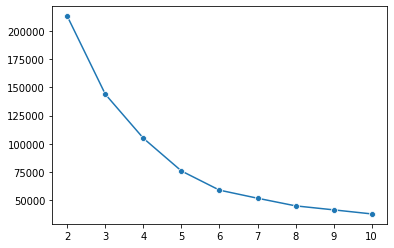

In [51]:
sns.lineplot(x = list(range(2, 11)), y = distance, marker = 'o')

## **Silhoutte Score(Elbow Method로 최적값을 찾기 어려울때 확인)**

In [52]:
from sklearn.metrics import silhouette_score

In [53]:
silhouette_score(data, model.labels_)

0.3801508806591857

In [54]:
sil = []
for i in range(2, 11):
    model = KMeans(n_clusters = i)
    model.fit(data)
    sil.append(silhouette_score(data, model.labels_))

<AxesSubplot:>

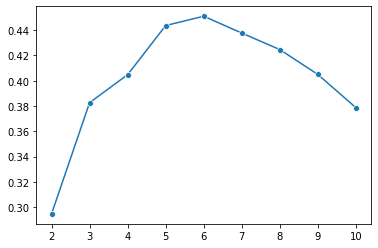

In [55]:
sns.lineplot(x = list(range(2, 11)), y = sil, marker = 'o')

In [56]:
model = KMeans(n_clusters = 6)
model.fit(data)
data['label'] = model.labels_

In [57]:
data.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,32.692308,86.538462,82.128205,0.461538
1,56.155556,53.377778,49.088889,0.444444
2,41.685714,88.228571,17.285714,0.571429
3,27.000000,56.657895,49.131579,0.342105
4,44.142857,25.142857,19.523810,0.380952
5,25.272727,25.727273,79.363636,0.409091


<AxesSubplot:xlabel='label', ylabel='Age'>

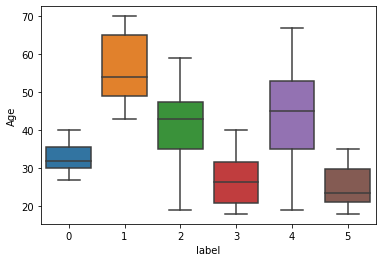

In [58]:
sns.boxplot(x = 'label', y = 'Age', data = data)

<AxesSubplot:xlabel='label', ylabel='Annual Income (k$)'>

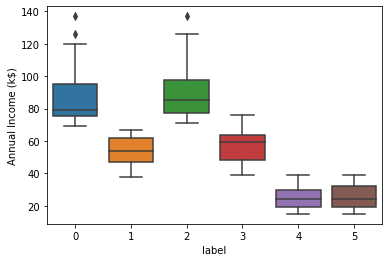

In [59]:
sns.boxplot(x = 'label', y = 'Annual Income (k$)', data = data)

## **PCA를 활용한 변수를 줄이고 scatter plot 그리기**

In [60]:
data.drop('label', axis = 1, inplace = True)

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components = 2)
pca.fit(data)
pca_df = pca.transform(data)

In [63]:
pca_df

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878330e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

In [64]:
pca_df = pd.DataFrame(pca_df, columns = ['PC1', 'PC2'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

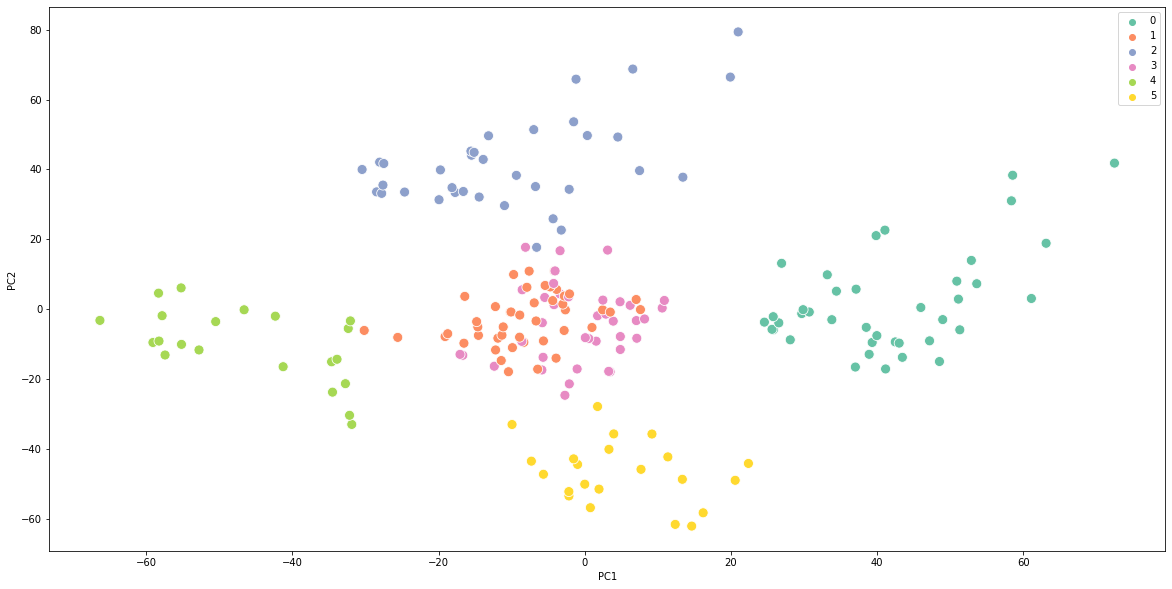

In [65]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = pca_df['PC1'], y = pca_df['PC2'], hue = model.labels_, palette = 'Set2', s = 100)